# Исследование объявлений о продаже квартир

<b>Задача:</b><br>
На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок <br>
<b>Описание проекта</b><br>
На основе данных кредитного отдела банка исследовал влияние семейного положения и
количества детей на факт погашения кредита в срок. Была получена информация о
данных. Определены и обработаны пропуски. Заменены типы данных на соответствующие
хранящимся данным. Удалены дубликаты. Категоризованы данные. Один датафрейм декомпозирован на три.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [65]:
import pandas as pd             # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib

In [66]:
# читаем csv-файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [67]:
display(data.head(5)) # анализируем первые 5 строк данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [68]:
data.info() # анализируем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [69]:
data.describe() #изучаем описание данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


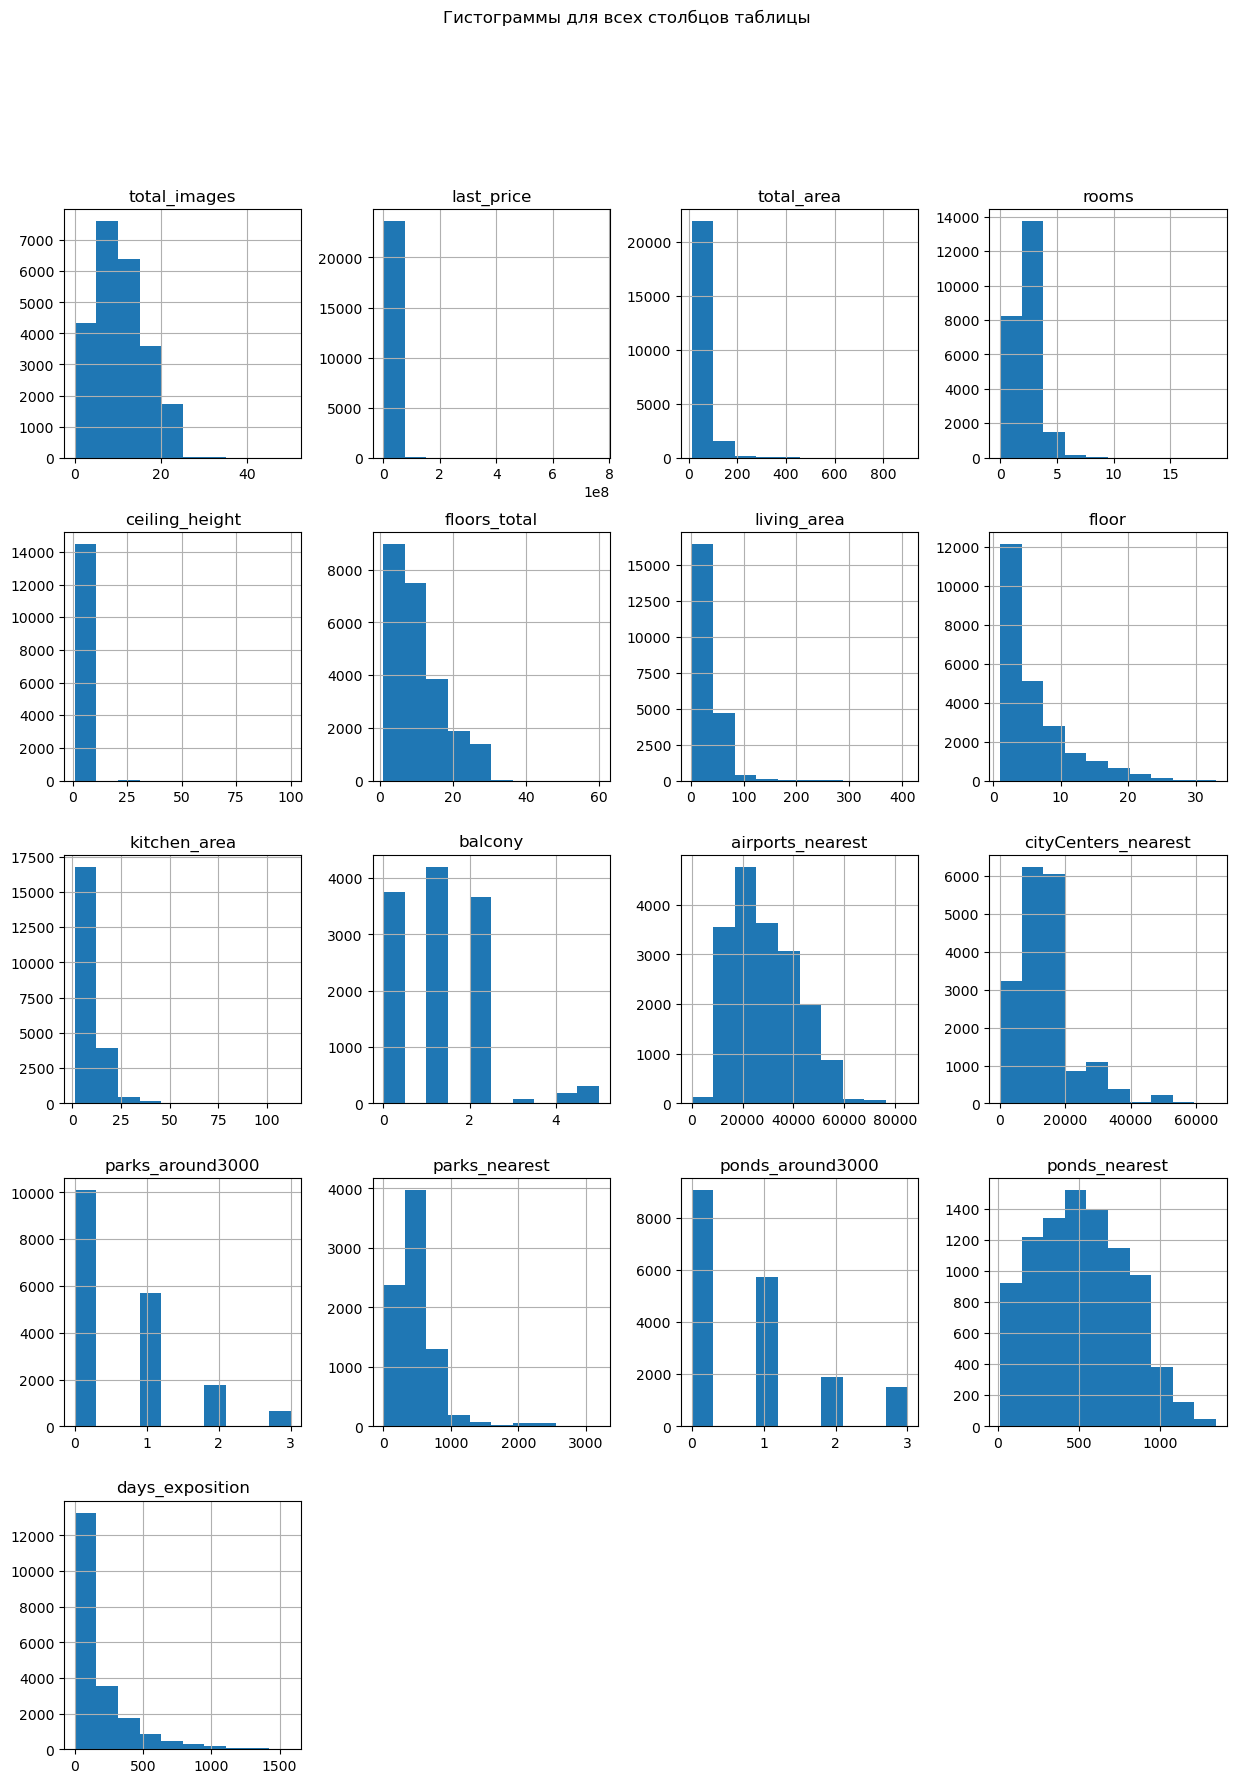

In [70]:
data.hist(figsize=(15, 20)) # строим общую гистограмму для всех столбцов таблицы
plt.suptitle("Гистограммы для всех столбцов таблицы")
plt.show()


**Анализируя данные, выяснилось, что:**

Всего в файле с данными - 23 669 строк. Есть столбцы с пропусками.
Полностью заполнены данными столбцы total_images, last_price, total_area,first_day_exposition, rooms, floor, studio, open_plan, living_area.   
У некоторых числовых полей есть тип данных float (например, ceiling_height) - т.к. в столбцах есть пропуски (NaN) и pandas такие столбцы автоматически назначает float, с ними можно выполнять математические операции.
В некоторых столбцах тип данных - int64 (floor, rooms), который не нужно преобразовывать.

### Предобработка данных

#### Анализируем пропуски

In [71]:
data.isnull().sum() # анализируем количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбцах есть пропущенные значения: 
* ceiling_height — высота потолков (м) - 9195 пропусков
* floors_total — всего этажей в доме - 86 пропусков
* living_area — жилая площадь в квадратных метрах (м²) - 1903 пропуска
* is_apartment — апартаменты - 20924 пропуска
* kitchen_area — площадь кухни в квадратных метрах (м²) - 2278 пропуска
* balcony — число балконов - 11519 пропусков
* locality_name — название населённого пункта - 49 пропусков
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - 5542 пропуска
* cityCenters_nearest — расстояние до центра города (м) - 5519 пропусков
* parks_around3000 — число парков в радиусе 3 км - 5518 пропусков
* parks_nearest — расстояние до ближайшего парка (м) - 15620 пропусков
* ponds_around3000 — число водоёмов в радиусе 3 км - 5518
* ponds_nearest — расстояние до ближайшего водоёма (м) - 14589 пропусков
* days_exposition — сколько дней было размещено объявление (от публикации до снятия) - 3181 пропуска

В столбцах floors_total и locality_name заполнены данными более 98% строк, поэтому такие пропуски далее можно будет удалить в связи с их малочисленностью.
В столбце balcony (балконы) пропусков - 11 519, скорее всего это означает что в квартире нет балкона и пропуски можно заменить на 0.

#### Проверяем явные дубликаты

In [72]:
print(data.duplicated().sum()) #проверим наличие дубликатов

0


Дубликатов не обнаружено.

#### Работаем над устранением пропусков

##### Столбец "balcony"

В столбце "balcony" в некоторых строках не указано число балконов — скорее всего, их нет. Такие пропуски можно заменить на 0. Кроме того, преобразуем этот столбец типа float64 к целочисленному типу данных (int).

In [73]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
display(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

##### Столбец "floors_total"

Также в столбце "floors_total" из 23 699 строк заполнено 23 613, не заполнено – 86. Максимальный этаж – 60. 
Удалим 86 строк, в которых не заполнено количество этажей.

In [74]:
# Удалим 86 строк столбца floors_total , в которых не заполнено количество этажей.
data = data.dropna(subset=['floors_total'])

##### Столбец "ceiling_height"

В столбце "ceiling_height" из 23 699 строк 9 195 пропусков, 14 504 сток заполнено. 
Максимальное значение 100м, минимальное значение 1м.
Рассмотрим подробнее уникальные значения данного столбца:

In [75]:
display(data['ceiling_height'].unique())
print('Высота более 10м:' ,data['ceiling_height'][data['ceiling_height'] > 10].count())
print('Высота менее 2м:',data['ceiling_height'][data['ceiling_height'] < 2].count())

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Высота более 10м: 25
Высота менее 2м: 3


В данных присутствуют экстремальные значения с высотой потолка более 10м, их 25шт.
Такие данные скорее всего являются ошибкой ввода пользоватля, например 27.5 это 2.75, а 100 это 10.0. В силу 
немногочисленности экстремальных данных их можно удалить, но лучше попробовать исправть ошибку ввода, разделив их на 10.
Есть несколько значений с подозрительной высотой менее 2м, но т.к. их всего 3, их можно очистить, как вероятные ошибки, а затем заменить пропуски медианой. 
Пропуски в данных появились скорее всего в силу необязательности данного атрибута в форме ввода для заполнения пользователем, или при повреждении данных. 

In [76]:
# Изменим строки с высотой потолков более 10 м, как это вероятные ошибки ввода данных
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = data['ceiling_height']/10
# Удалим значения строки с высотой потолков менее 2 м, как это вероятные ошибки ввода данных
data.loc[data['ceiling_height'] < 2,'ceiling_height'] = None
print(data['ceiling_height'][data['ceiling_height'] < 2].count()) # проверим отсутствие менее 2м

0


Пропуски в столбце "ceiling_height" заменим на медианы значений высот потолков по каждому этажу. Для этого напишем цикл перебирающий уникальные значения столбца 'floors_total' и в случае пропуска в столбце 'ceiling_height', заменим на медианное значение высоты потолков по каждому этажу

In [77]:
median_replace = data.groupby('floors_total')['ceiling_height'].median()
for total in data['floors_total'].unique(): #цикл перебирает уникальные значения столбца 'floors_total'
    data.loc[(data['floors_total'] == total) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_replace[total]
    #заменим пропуски на медианное значение высоты потолков по каждому этажу

##### Столбец "kitchen_area"

Пропуски в столбце "kitchen_area" заменим на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'kitchen_area', заменим на медианное значение площади кухни по данному количеству комнат. И удалим значения "NaN", т.к. это скорее всего ошибки данных.
Масимальное значение столбца равно 112.Экстремальных значений с кухней более 100м всего 3, ими можно пренебречь и удалить.

In [78]:
# удалим квартиры с кухней более 100м
data.loc[data['kitchen_area'] > 100,'kitchen_area'] = None
data = data.dropna(subset=['kitchen_area'])
print('Кухня более 100м:' ,data['kitchen_area'][data['kitchen_area'] > 100].count()) # проверка после удаления

Кухня более 100м: 0


In [79]:
median_replace_kitchen = data.groupby('rooms')['kitchen_area'].median()
for total in data['rooms'].unique(): #цикл перебирает уникальные значения столбца 'rooms'
    data.loc[(data['rooms'] == total) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_replace_kitchen[total]
    #заменим пропуски на медианное значение площади кухни по данному количеству комнат
    
# Исключим строки с записью "nan", как вероятные ошибки данных.
data.loc[data['kitchen_area'] == '  nan','kitchen_area'] = None
data = data.dropna(subset=['kitchen_area'])

##### Столбец "living_area"

Пропуски в столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'living_area', заменит на медианное значение жилой площади по данному количеству комнат

In [80]:
median_replace_kitchen = data.groupby('rooms')['living_area'].median()
for total in data['rooms'].unique(): #цикл перебирает уникальные значения столбца 'rooms'
    data.loc[(data['rooms'] == total) & (data['living_area'].isna()), 'living_area'] = median_replace_kitchen[total]
    #заменим пропуски на медианное значение жилой площади по данному количеству комнат   

##### Столбец "is_apartment"

Пропуски в столбце "is_apartment" заменим на False. После удаления пропусков тип данных из object изменился на bool

In [81]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заменим пропуски на False

##### Столбец "last_price"

Минимум в столбце 12 190 похож на ошибку, поэтому удалим его

In [82]:
# Удалим значения с наименьшей ценой квартиры. Всего одна квартира с ценой менее 12 190 руб
# display(data['last_price'][data['last_price'] == 12190].count())
data.loc[data['last_price']== 12190,'last_price'] = None
data = data.dropna(subset=['last_price'])
data['last_price'][data['last_price'] == 12190].count() # проверка после удаления

0

##### Столбец "locality_name"

Удалим пропуски в столбце "locality_name", это скорее всего ошибки данных

In [83]:
data = data.dropna(subset=['locality_name']) #удалим пропуски

##### Столбец "days_exposition"

Отсутствие данных в этом столбце days_exposition (сколько дней было размещено каждое объявление до снятия) не означает ошибку данных, больше всего пропусков у свежих объявлений 2019 года, что говорит о том, что квартира не продана, поэтому и не рассчитано количество дней показов до продажи. 
Мое первоначальное решение заполнять пропуски нулями для этого столбца было не корректно, т.к. мы будем далее анализировать срок продажи, а 0 будет свидетельствовать о быстрой продаже в тот же день. 
Пропусков в столбце 3181, это значительный объям данных, удалить пустые строки тоже нельзя.

Зависимость по годам я анализировал, большее число пропусков у последнего в данных 2019 года, но также есть пропуски и в предыдущих годах. Учитвая, что мах время продажи 1580 дней, я не думаю что пропуски в ранних годах это ошибка, квартиры могут продаваться годами при каких то факторах, например заведомо завышенной цене изначально, поэтому объявления еще активны и нет значения в ячейке.

##### Остальные столбцы

Остальные столбцы являются картографическими, их нет смысла заполнять нулями или усредненными данными. 
* airports_nearest
* cityCenters_nearest      
* parks_around3000         
* parks_nearest           
* ponds_around3000         
* ponds_nearest           

#### Исключаем не явные дубли

Исследуем уникальные значения столбца "locality_name":

In [84]:
display(sorted(data['locality_name'].unique())) #выводим отсортированный список уникальных значений

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Аг

Анализируя значения, можно заменить неявные дубли:
* в некоторых местах слово "поселок" написано с "е", в некоторых с "ё"
* есть разное написание "городской посёлок" и "посёлок городского типа"
* "посёлок при железнодорожной станции" и "посёлок станции" тоже написаны по разному

Исправим это.

In [85]:
#заменим все слова "поселок" на "посёлок" в столбце "locality_name"
data['locality_name'] = [_.replace("поселок","посёлок") for _ in data['locality_name']]
#заменим все фразы  "посёлок городского типа" на "городской посёлок" в столбце "locality_name"
data['locality_name'] = [_.replace('посёлок городского типа','городской посёлок') for _ in data['locality_name']]
#заменим все фразы  "посёлок при железнодорожной станции" на "посёлок станции" в столбце "locality_name"
data['locality_name'] = [_.replace('посёлок при железнодорожной станции','посёлок станции') for _ in data['locality_name']]

#### Анализ типов данных

##### Столбец first_day_exposition

Данный столбец содержит дату первой публикации объявления, тип данных object, приведем его к типу datetime64 для дальнейшей удобной работы

In [86]:
# столбец "first_day_exposition" приведем к удобному виду, оставим год, месяц, день
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

##### Столбец floors_total

Данный столбец содержит количество этажей в доме, текущий тип данных float64. Этот показатель не может быть дробным, поэтому приведем его к типу Int

In [87]:
# преобразуем столбец к целочисленному типу данных (int).
data['floors_total'] = data['floors_total'].astype(int)

#### Столбец "balcony"

Данный столбец содержит количество балконов в квартире, первоначальный тип данных был float64. Этот показатель не может быть дробным, поэтому мы его привели к целочисленному типу данных на этапе заполнения пропусков нулями.

**Итоги предобработки данных**

В первоначальном файле было 23 699 строк, в результате обработки и удаления вероятных ошибок данных осталось в датасете 21 339 строк. 
В процессе обработки данных произведено следующее:
* столбец "balcony" пропуски были заменены на 0, также столбец преобразован к целочисленному типу данных.
* столбец "ceiling_height" исправили ошибки ввода данных и заменили пропуски на медианы значений высот потолков по каждому этажу.
* столбец "kitchen_area" заменили на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms".
* столбец "living_area" заменили на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms".
* столбец "is_apartment" пропуски заменили на False, тип данных изменился на bool
* столбец "locality_name" пропуски удалили как вероятные ошибки и исправвили не явные дубликаты 
* Столбец "floors_total" был преобразован к целочисленному типу данных
* Столбец "first_day_exposition" был преобразован к типу данных datetime64

Значения в остальных столбцах не менялись, т.к. они являются картографическими.

### Посчитайте и добавьте в таблицу новые столбцы

#### Столбец цена одного квадратного метра

In [88]:
data['price_m2']=data['last_price']/data['total_area'] # делим стоимость на количество квадратных метров

#### Столбцы день недели/месяц/год публикации объявления

In [89]:
# добавим столбец день недели
data['day_weekday'] = data['first_day_exposition'].dt.weekday
# добавим столбец месяц
data['day_month'] = data['first_day_exposition'].dt.month
# добавим столбец год
data['day_year'] = data['first_day_exposition'].dt.year

#### Столбец тип этажа квартиры (значения — «первый», «последний», «другой»)

In [90]:
# добавим столбец тип этажа и заполним его значением "другой"
data['floor_group'] = 'другой'
# изменим значения для первого этажа
data['floor_group'] = data['floor_group'].where(data['floor'] > 1, 'первый') 
# изменим значения для последнего этажа
data['floor_group'] = data['floor_group'].where(data['floor'] < data['floors_total'], 'последний') 

#### Столбец расстояние до центра города в километрах

In [91]:
# добавим столбец расстояние до центра города в километрах
data['cityCenters_km']=round(data['cityCenters_nearest']/1000)

**В данном разделе мы добавили в исходную таблицу следующие столбцы:**
* цену квадратного метра 'price_m2';
* день недели 'day_weekday', месяц 'day_month' и год 'day_year' публикации объявления;
* варианты этажности квартиры 'floor_group' — первый, последний, другой;
* расстояние до центра города в километрах 'cityCenters_km'

### Проведите исследовательский анализ данных

#### Изучим основные параметры объектов

##### Исследуем общую площадь

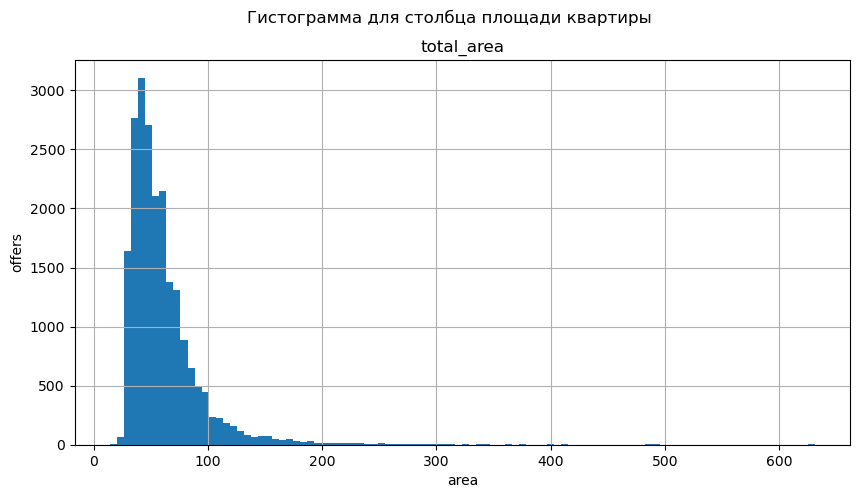

count    21339.000000
mean        60.648574
std         34.495573
min         14.000000
25%         40.500000
50%         52.300000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64


In [139]:
# Гистограмма для столбца площади квартиры
data.hist('total_area', bins=100, figsize = (10,5))
plt.ylabel('offers')
plt.xlabel('area')
plt.suptitle("Гистограмма для столбца площади квартиры")
plt.show()
print(data['total_area'].describe())

Из гистограммы видно, что бOльшим спросом пользуются квартиры до 100 м2, среднее значение площади составляет - 60,65 м2. Квартиры с площадью более 180 м2 являются редкостью. Более 200 м2 предложений очень мало. Максимальное значение 631.2 м2.

здорово, спасибо!

##### Исследуем жилую площадь

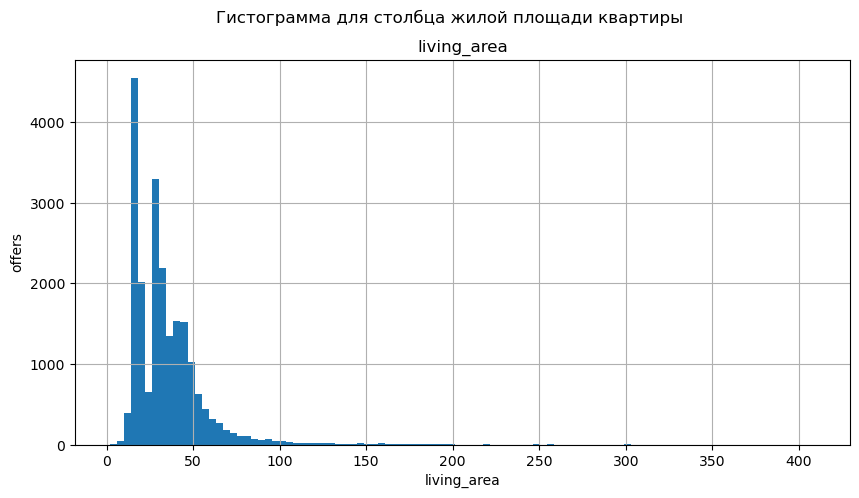

count    21339.000000
mean        34.574987
std         21.661798
min          2.000000
25%         18.700000
50%         30.200000
75%         42.600000
max        409.000000
Name: living_area, dtype: float64


In [140]:
# Гистограмма для столбца жилой площади квартиры
data.hist('living_area', bins=100, figsize = (10,5))
plt.suptitle("Гистограмма для столбца жилой площади квартиры")
plt.ylabel('offers')
plt.xlabel('living_area');
plt.show()
print(data['living_area'].describe())

Из гистограммы видно, что средняя жилая площадь 34.57 м2. Большее количество предложений в сегменте до 50 м2.

##### Исследуем площадь кухни

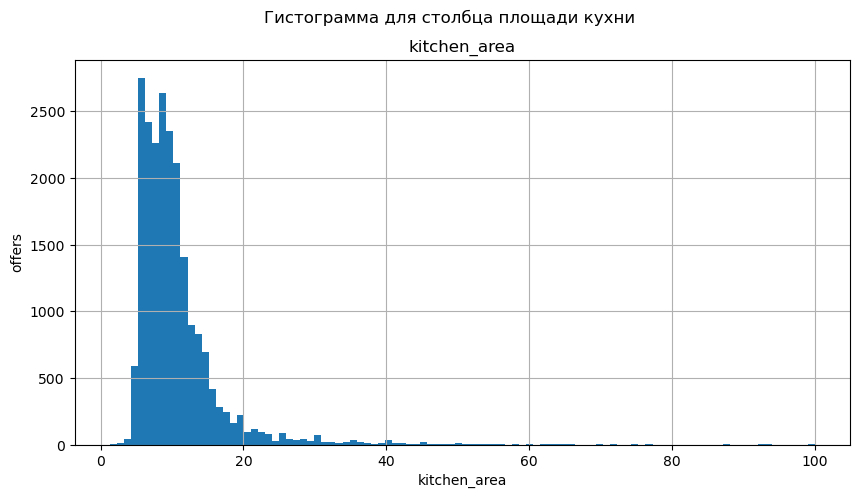

count    21339.000000
mean        10.546094
std          5.786437
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        100.000000
Name: kitchen_area, dtype: float64


In [141]:
# Гистограмма для столбца площади кухни
data.hist('kitchen_area', bins=100, figsize = (10,5))
plt.suptitle("Гистограмма для столбца площади кухни")
plt.ylabel('offers')
plt.xlabel('kitchen_area')
plt.show()
print(data['kitchen_area'].describe())

Из гистограммы видно, что средняя площадь кухни 10.5 м2. Большее количество предложений в сегменте до 15 м2.

##### Исследуем цену объекта

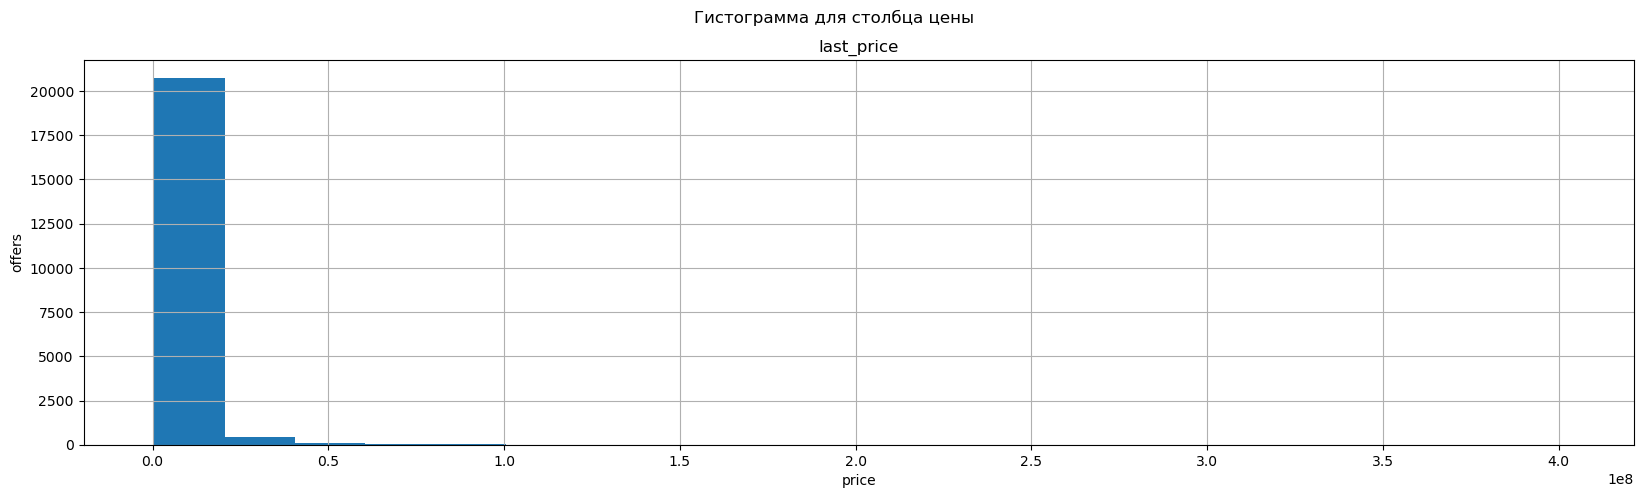

count    2.133900e+04
mean     6.517143e+06
std      9.302369e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.013000e+08
Name: last_price, dtype: float64


In [144]:
# Гистограмма для столбца цены
data.hist('last_price', bins=20, figsize = (20,5))
plt.suptitle("Гистограмма для столбца цены")
plt.ylabel('offers')
plt.xlabel('price')
plt.show()
print(data['last_price'].describe())

Из гистограммы видно, что большинство квартир стоимостью до 17,5 млн. рублей, средняя цена 6,51 млн. руб, максимальная стоимость квартиры составляет 401 млн. рублей.

##### Исследуем количество комнат

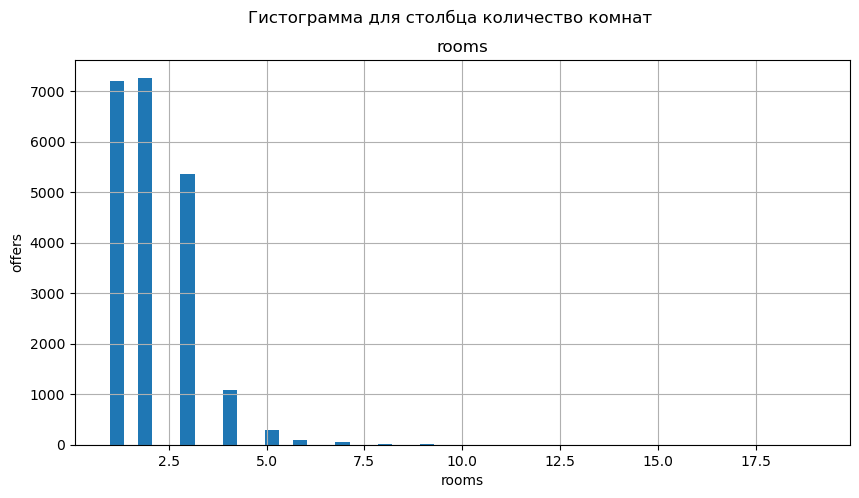

count    21339.000000
mean         2.094709
std          1.061021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [145]:
# Гистограмма для столбца количество комнат
data.hist('rooms', bins=50, figsize = (10,5))
plt.ylabel('offers')
plt.xlabel('rooms')
plt.suptitle("Гистограмма для столбца количество комнат")
plt.show()
print(data['rooms'].describe())

Из гистограммы видно, что наиболее популярные квартиры 1 и 2 комнатные квартиры, немного ниже спрос на 3 комнатные квартиры, на остальные категории спрос в разы ниже.

##### Исследуем высоту потолков

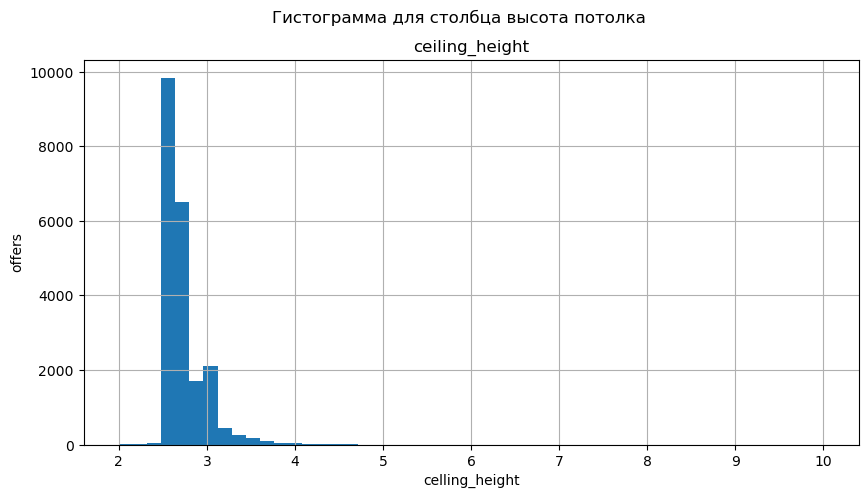

count    21337.000000
mean         2.708454
std          0.248948
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64


In [157]:
# Гистограмма для столбца высота потолка
data.hist('ceiling_height', bins=50, figsize = (10,5))
plt.suptitle("Гистограмма для столбца высота потолка")
plt.ylabel('offers')
plt.xlabel('celling_height')
plt.show()
print(data['ceiling_height'].describe())

Из гистограммы видно, что высота потолков в среднем 2.5 - 2.7 м, средняя высота потолков - 2,7 м. Максимальная высота - 10 м.

##### Исследуем этаж квартиры

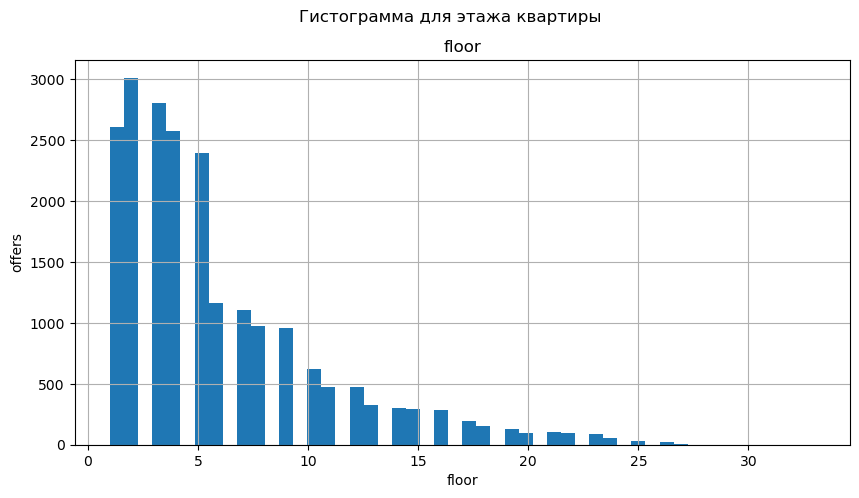

count    21339.000000
mean         5.846291
std          4.820121
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [156]:
# Гистограмма для этажа квартиры
data.hist('floor', bins=50, figsize = (10,5))
plt.suptitle("Гистограмма для этажа квартиры")
plt.ylabel('offers')
plt.xlabel('floor')
plt.show()
print(data['floor'].describe())

Из гистограммы видно, наибольшее количество предложений в сегменте 2-5 этажи, спрос на этажи с 6 по 10-й этажи ниже почти в 2 раза.

##### Исследуем тип этажа квартиры («первый», «последний», «другой»)

In [99]:
print(data['floor_group'].describe())

count      21339
unique         3
top       другой
freq       15696
Name: floor_group, dtype: object


Наиболее популярными этажами являются "другой", т.е. не первый и не последний. Зависимость цены от этого праметра мы определим на графике позже.

##### Исследуем общее количество этажей в доме

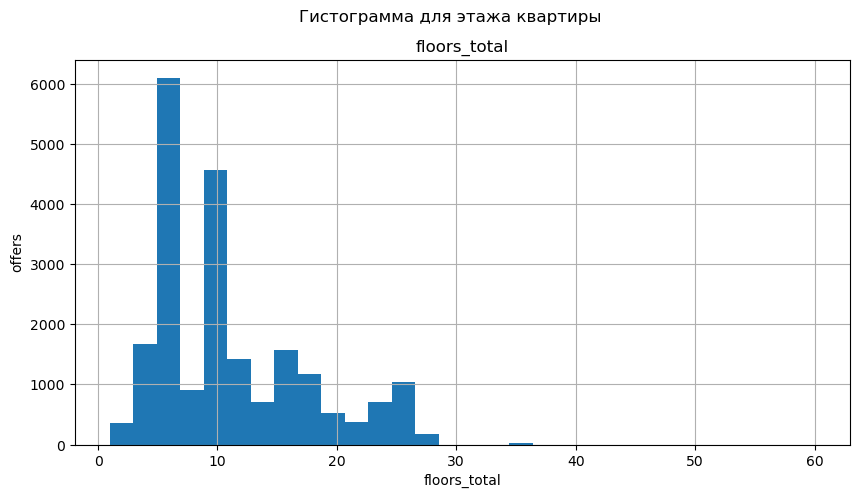

count    21339.000000
mean        10.587750
std          6.530943
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64


In [155]:
# Гистограмма для этажа квартиры
data.hist('floors_total', bins=30, figsize = (10,5))
plt.suptitle("Гистограмма для этажа квартиры")
plt.ylabel('offers')
plt.xlabel('floors_total')
plt.show()
print(data['floors_total'].describe())

Большее число предложений приходится на 5-ти этажки и на 9-ти этажки. Мах этажность зданий в предложениях 60.

##### Исследуем расстояние до центра города в метрах

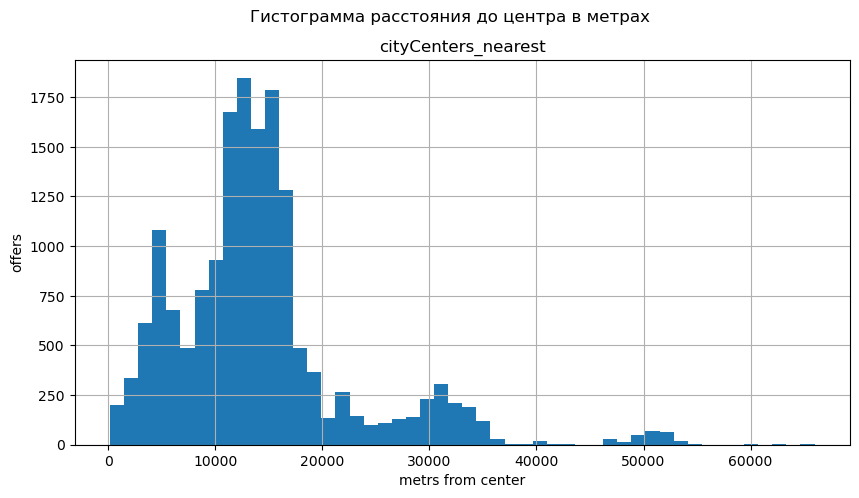

count    16544.000000
mean     14226.213370
std       8651.905289
min        181.000000
25%       9289.750000
50%      13096.500000
75%      16268.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [154]:
# Гистограмма расстояния до центра в метрах
data.hist('cityCenters_nearest', bins=50, figsize = (10,5))
plt.suptitle("Гистограмма расстояния до центра в метрах")
plt.ylabel('offers')
plt.xlabel('metrs from center')
plt.show()
print(data['cityCenters_nearest'].describe())

Максимальное количество предложений на удалении 10-17 км от центра. Максимальное значение 65.9 км.

##### Исследуем расстояние расстояние до ближайшего аэропорта

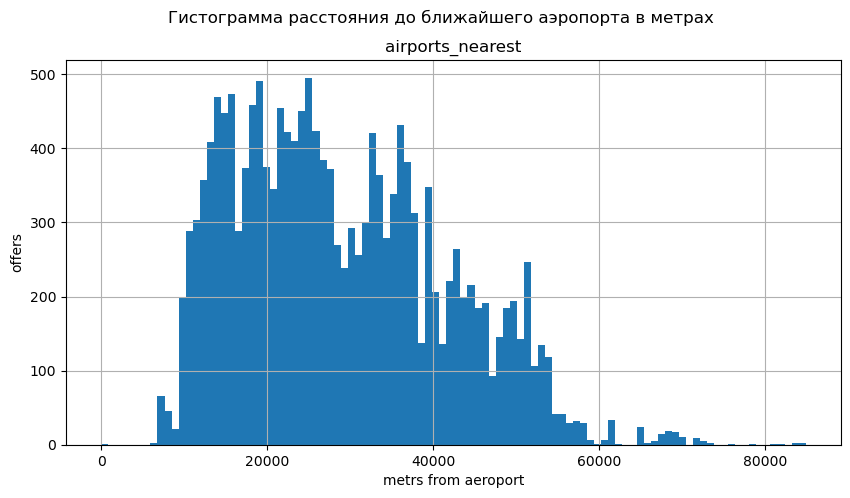

count    16523.000000
mean     28819.457968
std      12637.927447
min          0.000000
25%      18554.500000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [158]:
# Гистограмма расстояния до ближайшего аэропорта в метрах
data.hist('airports_nearest', bins=100, figsize = (10,5))
plt.suptitle("Гистограмма расстояния до ближайшего аэропорта в метрах")
plt.ylabel('offers')
plt.xlabel('metrs from aeroport')
plt.show()
print(data['airports_nearest'].describe())

Наиболее многочисленны предложения с расстоянием от 10 до 40 км. Мах значение удаленности 84.8 км.

##### Исследуем расстояние до ближайшего парка

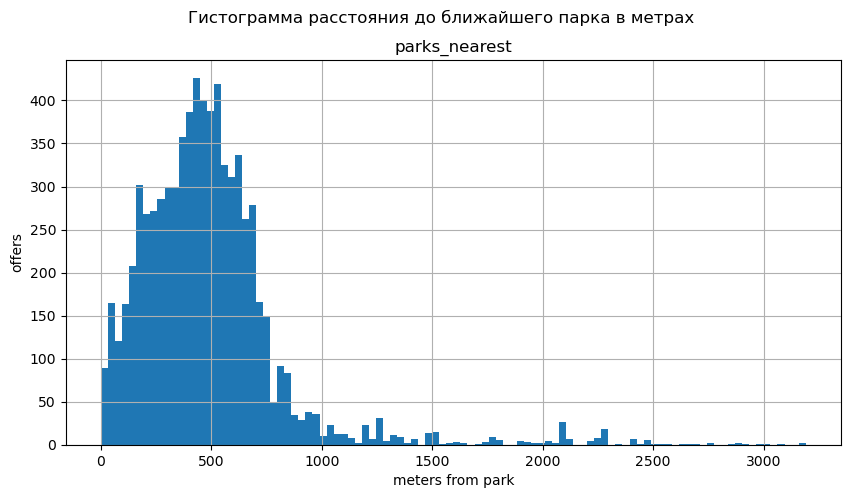

count    7362.000000
mean      488.014670
std       338.486348
min         1.000000
25%       287.000000
50%       452.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [159]:
# Гистограмма расстояния до ближайшего парка в метрах
data.hist('parks_nearest', bins=100, figsize = (10,5))
plt.suptitle("Гистограмма расстояния до ближайшего парка в метрах")
plt.ylabel('offers')
plt.xlabel('meters from park')
plt.show()
print(data['parks_nearest'].describe())

Наибольшее число предложений на удаленности 200-700м. Мах расстояние 3.19 км

##### Исследуем день и месяц публикации объявления.

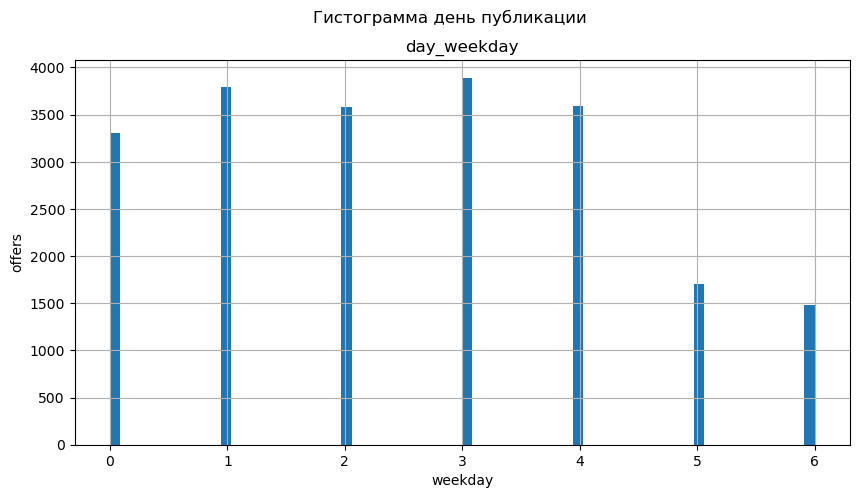

count    21339.000000
mean         2.548479
std          1.783410
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: day_weekday, dtype: float64


In [160]:
# Гистограмма день публикации
data.hist('day_weekday', bins=70, figsize = (10,5))
plt.suptitle("Гистограмма день публикации")
plt.ylabel('offers')
plt.xlabel('weekday')
plt.show()
print(data['day_weekday'].describe())

С понедельника по пятницу примерно равное число предложений. В сб и вс почти в 2 раза меньше

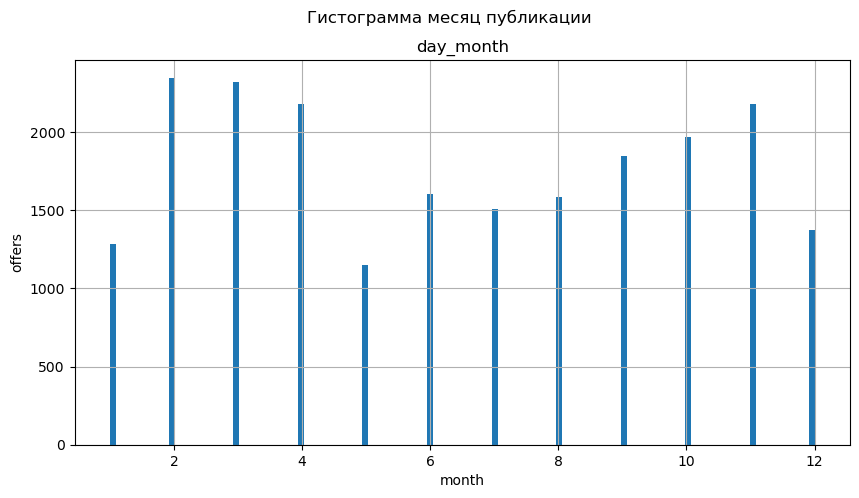

count    21339.000000
mean         6.419607
std          3.467177
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: day_month, dtype: float64


In [161]:
# Гистограмма месяц публикации
data.hist('day_month', bins=120, figsize = (10,5))
plt.suptitle("Гистограмма месяц публикации")
plt.ylabel('offers')
plt.xlabel('month')
plt.show()
print(data['day_month'].describe())

В январе и мае меньше всего выставлялось. Февраль, март, апрель и ноябрь приммерно равные большие значения. 

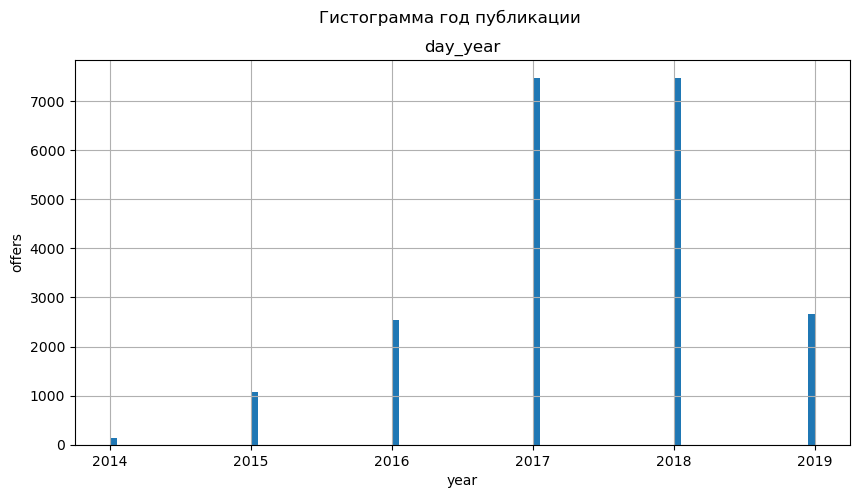

count    21339.000000
mean      2017.362763
std          1.044938
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: day_year, dtype: float64


In [138]:
# Гистограмма год публикации
ax=data.hist('day_year', bins=100, figsize = (10,5))
plt.ylabel('offers')
plt.xlabel('year');
plt.suptitle("Гистограмма год публикации")
plt.show()
print(data['day_year'].describe())

Минимум предложений в 2014, максимум был в 2017 и 2018 годах.

#### Изучим время продажи квартиры, посчитаем среднее и медиану

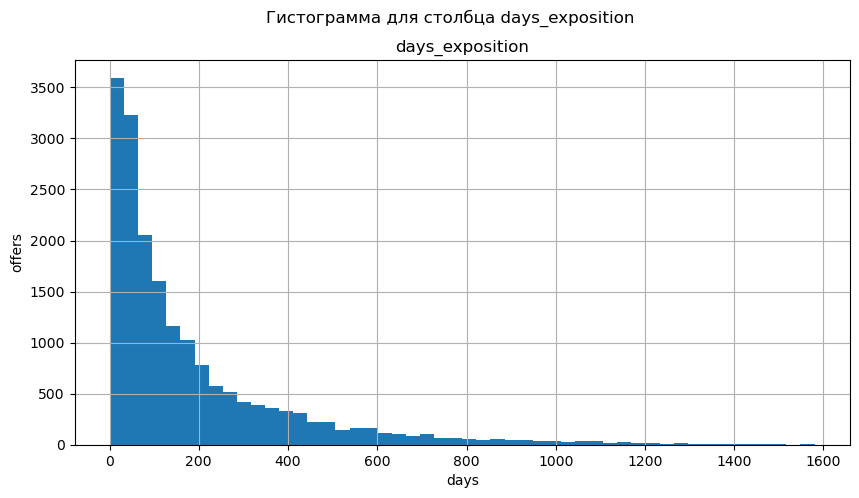

count    18367.000000
mean       185.455709
std        222.481833
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64
Среднее: 185
Медиана: 102


In [162]:
# Гистограмма для столбца "days_exposition"
ax=data.hist('days_exposition', bins=50, figsize = (10,5))
plt.suptitle("Гистограмма для столбца days_exposition")
plt.ylabel('offers')
plt.xlabel('days')
plt.show()
print(data['days_exposition'].describe())
print('Среднее:', round(data['days_exposition'].mean()))
print('Медиана:', round(data['days_exposition'].median()))

Из гистограммы видно, что обычно квартиры продаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев (медленная продажа). Среднее время продажи - 185 дней, значение медианы составляет 102 дня. Максимальное время продажи 1580 дней (более 4х лет).

#### Изучаем какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Рассмотрим, какие факторы больше всего влияют на стоимость квартиры, построим коэффициент корреляции.

In [108]:
print(data.corr()[['last_price', 'price_m2']]) # расчитаем коэффициенты корреляции Пирсона для общей цены и цены м2 

                     last_price  price_m2
total_images           0.118388  0.136997
last_price             1.000000  0.754502
total_area             0.688165  0.299200
rooms                  0.390394  0.051499
ceiling_height         0.336104  0.316772
floors_total          -0.004201  0.156095
living_area            0.593387  0.209348
floor                  0.025498  0.133640
is_apartment           0.037019  0.054689
studio                      NaN       NaN
open_plan                   NaN       NaN
kitchen_area           0.512153  0.398306
balcony                0.007533  0.022546
airports_nearest      -0.030443 -0.037017
cityCenters_nearest   -0.234670 -0.326506
parks_around3000       0.169560  0.186209
parks_nearest         -0.020242  0.003601
ponds_around3000       0.177257  0.193633
ponds_nearest         -0.104565 -0.107258
days_exposition        0.092639  0.044359
price_m2               0.754502  1.000000
day_weekday           -0.005479 -0.010291
day_month             -0.003704 -0

В данном исследовании нас интересует влияние на полную стоимость следующих факторов:
* total_area  = 0.118388   - положительная корреляция
* living_area = 0.593387   - максимальное значение положительной корреляции 
* kitchen_area= 0.512153   - высокое значение положительной корреляции
* rooms       = 0.390394   - положительная корреляция
* day_weekday =-0.005479   - слабая отрицательная корреляция
* day_month   =-0.003704   - слабая отрицательная корреляция
* day_year    =-0.041721   - отрицательная корреляция

При положительной линейной корреляции более высоким значениям одного признака соответствуют более высокие значения другого. 
При отрицательной линейной корреляции более высоким значениям одного признака соответствуют более низкие значения другого.

Рассмотрим далее более детально влияние каждого из факторов на полную стоимость на графиках.

##### зависит ли цена от общей площади

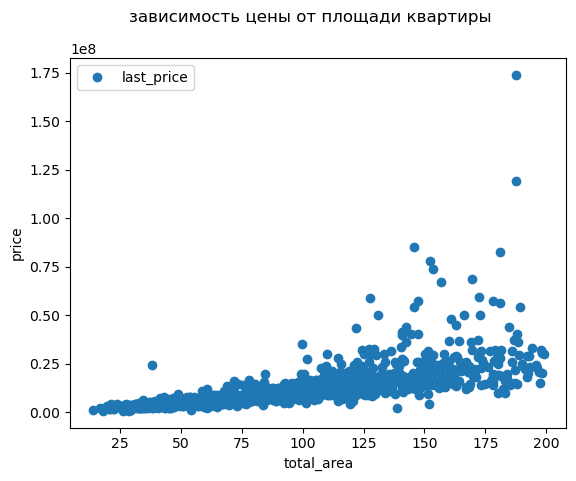

In [135]:
# Оценим зависимость цены от площади квартиры
ax=data.query('total_area<200').pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o')
ax.set_ylabel('price')
plt.suptitle("зависимость цены от площади квартиры")
plt.show()

Чем бельше общая площадь, тем выше цена квартиры

##### зависит ли цена от жилой площади

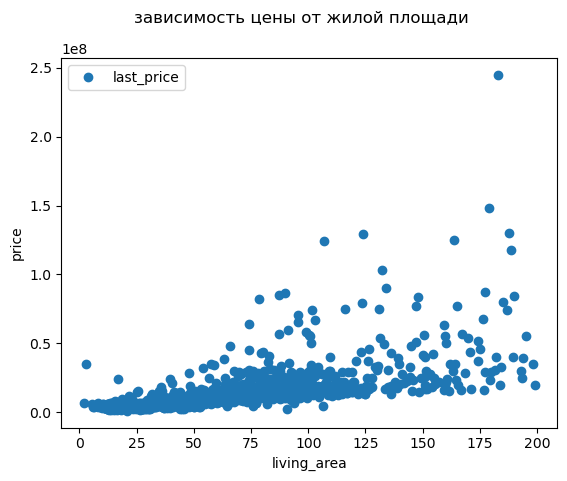

In [134]:
# Оценим зависимость цены от жилой площади
ax=data.query('living_area<200').pivot_table(index='living_area', values='last_price', aggfunc='median').plot(style='o')
ax.set_ylabel('price')
plt.suptitle("зависимость цены от жилой площади")
plt.show()

График похож на предыдущий, увеличение жилой площади приводит к повышению цены

##### зависит ли цена от площади кухни

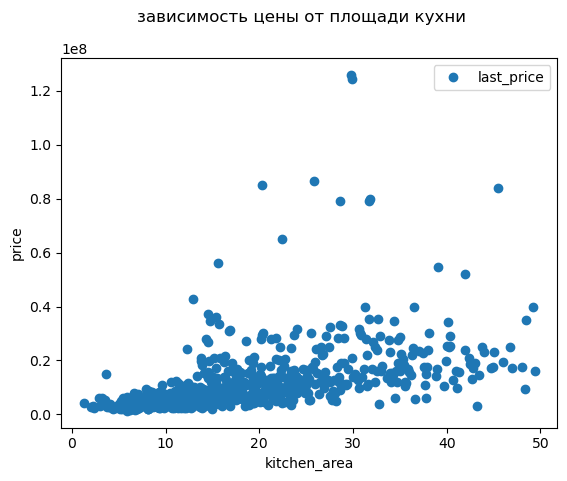

In [133]:
# Оценим зависимость цены от площади кухни
ax=data.query('kitchen_area<50').pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(style='o')
ax.set_ylabel('price')
plt.suptitle("зависимость цены от площади кухни")
plt.show()

Увеличение площади кухни повышает и цену

##### зависит ли цена от количества комнат

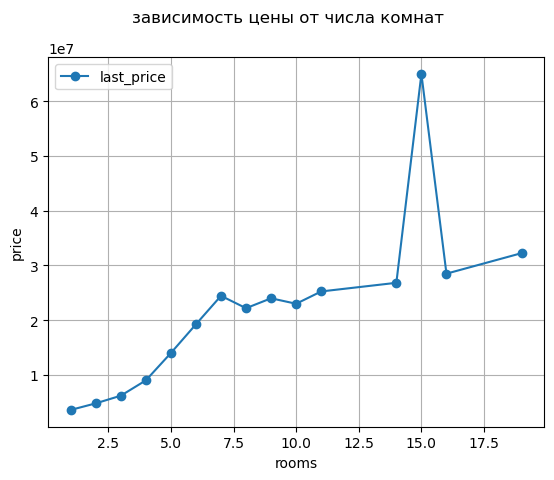

In [132]:
# Оценим зависимость цены от числа комнат
ax=data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-',grid=True)
ax.set_ylabel('price')
plt.suptitle("зависимость цены от числа комнат")
plt.show()

Количество комнат сильно влияет на цену при показателе 1-7 идет резкий рост цены, далее 7-14 примерно на одном уровне (на 8 и 10 наблюдаем незначительное снижение), для 15 комнат наблюдается эстремальный рост, за которым спад на 16

##### зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

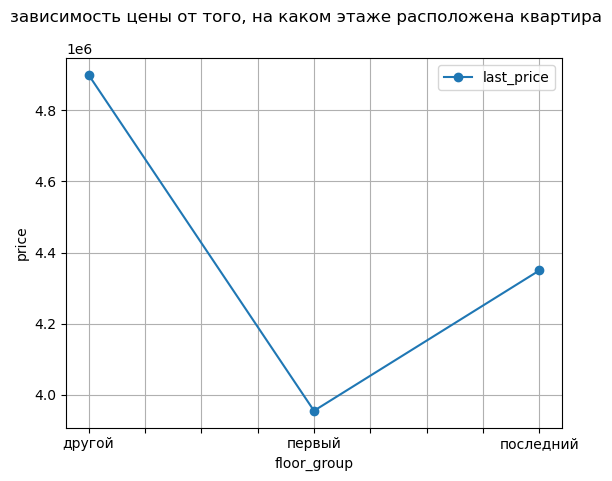

In [131]:
# Оценим зависимость цены от того, на каком этаже расположена квартира
ax=data.pivot_table(index='floor_group', values='last_price', aggfunc='median').plot(style='o-',grid=True)
ax.set_ylabel('price')
plt.suptitle("зависимость цены от того, на каком этаже расположена квартира")
plt.show()

На первом этаже цена существенно ниже чем на последнем и других. Квартиры на первом и последнем этажах дешевле чем на других этажах. 

##### зависит ли цена от даты размещения (день недели, месяц, год)

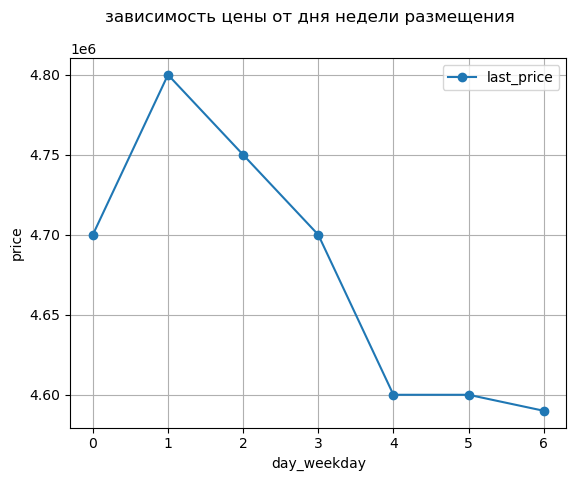

In [130]:
# Оценим зависимость цены от дня недели размещения
ax=data.pivot_table(index='day_weekday', values='last_price', aggfunc='median').plot(style='o-', grid=True)
ax.set_ylabel('price')
plt.suptitle("зависимость цены от дня недели размещения")
plt.show()

Интересная зависимость, в понедельник цена ниже чем во вторник. Во вторник она мах и снижается до субботы. В субботу цена минимальна. В субботу и воскресенье цена ниже чем в остальные дни.

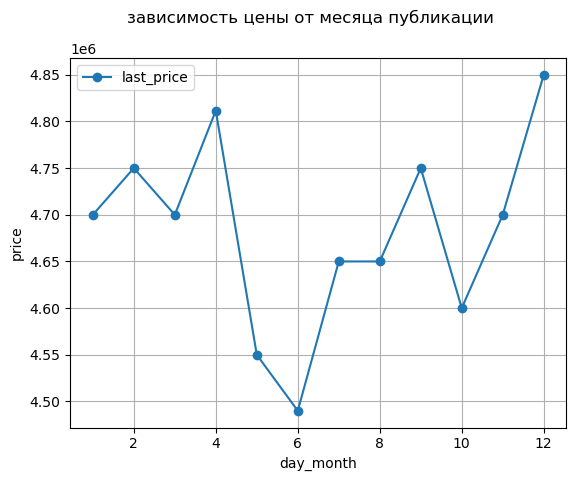

In [129]:
# Оценим зависимость цены от месяца публикации
ax=data.pivot_table(index='day_month', values='last_price', aggfunc='median').plot(style='o-', grid=True)
ax.set_ylabel('price')
plt.suptitle("зависимость цены от месяца публикации")
plt.show()

Январь и февраль цена одинакова, в марте спад, затем в апреле рост до мах, затем спад до июня, потом снова рост в июле до мах и спад до октября. После чего снова следует рост до декабря.

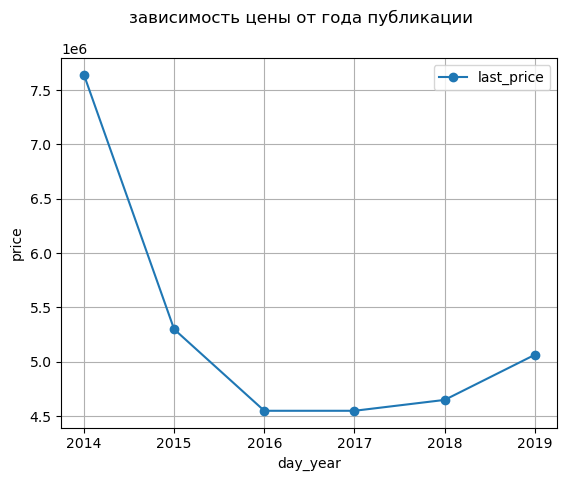

In [128]:
# Оценим зависимость цены от года публикации
ax=data.pivot_table(index='day_year', values='last_price', aggfunc='median').plot(style='o-',grid=True)
ax.set_ylabel('price')
plt.suptitle("зависимость цены от года публикации")
plt.show()

Наибольшая цена квартир была в 2014. Цены на квартиры падали с 2014 года по 2016, замет начался небольшой рост и продолжился до 2019 года.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и проанализируем

In [117]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
locality=data['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(locality)

Санкт-Петербург      14304
посёлок Мурино         450
посёлок Шушары         397
Всеволожск             357
Пушкин                 338
Колпино                322
Гатчина                294
посёлок Парголово      289
деревня Кудрово        231
Выборг                 201
Name: locality_name, dtype: int64

In [118]:
# Посчитаем среднюю цену м2 в этих населённых пунктах, выделим пункты с самой высокой и низкой стоимостью жилья.
data.query('locality_name in @locality.index').pivot_table(index='locality_name', values='price_m2', aggfunc='mean').sort_values('price_m2')

,price_m2
locality_name,
Выборг,58365.453226
Гатчина,68692.933833
Всеволожск,69029.150099
Колпино,75226.296359
посёлок Шушары,78413.736982
посёлок Мурино,85221.513672
посёлок Парголово,90691.342386
деревня Кудрово,92147.617400
Пушкин,103247.024342


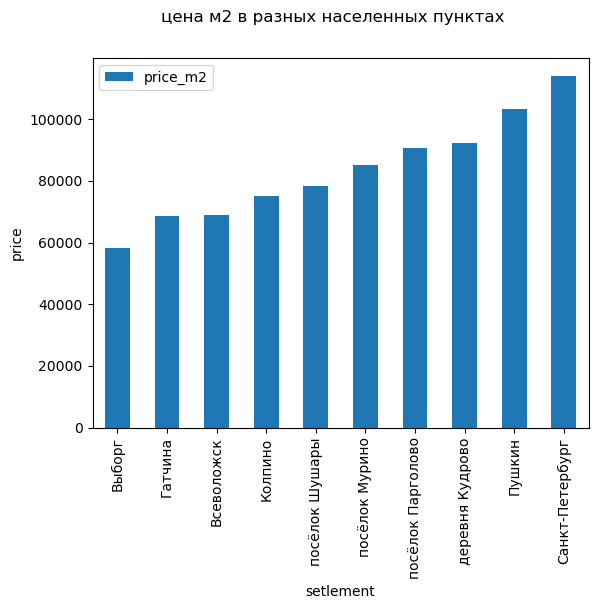

In [163]:
# визуалирируем полученные данные
ax=data.query('locality_name in @locality.index').pivot_table(index='locality_name', values='price_m2', aggfunc='mean').sort_values('price_m2').plot(kind='bar')
ax.set_ylabel('price')
ax.set_xlabel('setlement')
plt.suptitle("цена м2 в разных населенных пунктах")
plt.show()

Самая низкая стоимость квадратного метра в Выборге 58365 руб и самая высокая в Санкт-Петербурге 114170 руб.

#### Влияние расстояния от центра на цену кватрир в Санкт-Петербурге

In [120]:
# создадим копию таблицы с предложениями квартир СПБ
data_spb=data.query('locality_name =="Санкт-Петербург"')
# удалим пропуски в столбце расстония до центра в км, их всего 45 
data_spb=data_spb.dropna(subset=['cityCenters_km'])
# Переведем данные столбца к типу int
data_spb['cityCenters_km']=data_spb['cityCenters_km'].astype(int)
# посчитаем среднюю цену для каждого километра.
data_spb['price_km'] = data_spb['last_price'] / data_spb['cityCenters_km']

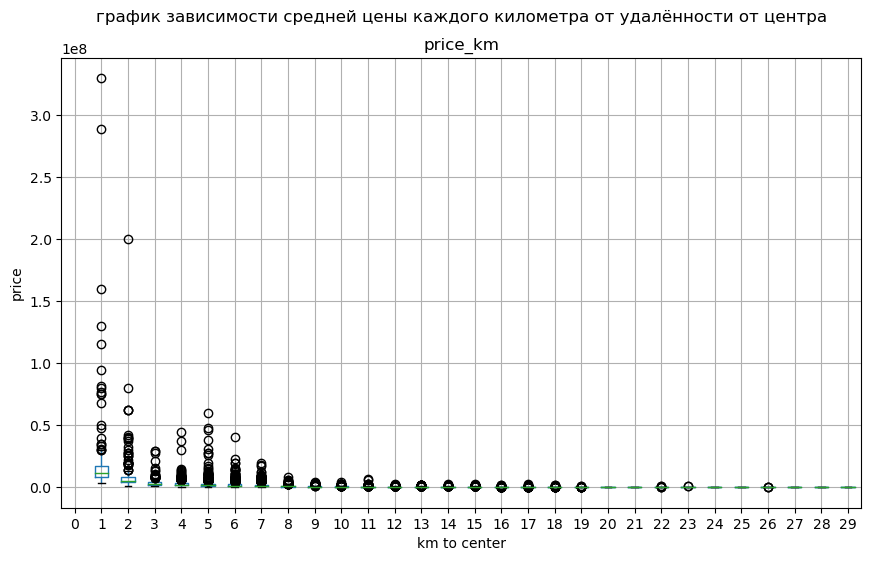

In [167]:
# Построим график зависимости средней цены каждого километра от удалённости от центра
import warnings
warnings.filterwarnings("ignore")
ax=data_spb.boxplot('price_km', by='cityCenters_km', figsize=(10,6))
plt.suptitle("график зависимости средней цены каждого километра от удалённости от центра")
ax.set_ylabel('price')
ax.set_xlabel('km to center')
plt.show()

Из графика видно, что максимальная цена квартиры в районе первых 1-2 км от центра, далее снижается до 3 км. и снова растет до 5 км, после чего цена падает до 8км и затем практически не меняется.

**Выводы по данному разделу:**


Анализ показал, что на общую цену влияют следующие факторы:
* чем бельше общая площадь, тем выше цена квартиры
* увеличение жилой площади приводит к повышению цены
* увеличение площади кухни повышает и цену
* количество комнат сильно влияет на цену повышение цены.
* этаж сильно влияет на цену, на первом этаже цена минимальная, а на последнем значительно ниже чам на других этажах.
* день публикации влияет на цену, в понедельник цена ниже чем во вторник, а в воскресенье цена минимальна.
* месяц публикации влияет на цену, наименьшая цена в июне, наибольшая в апреле, июле и декабре
* анализ года публикации показал, что мах цена квартир была в 2014 затем было падение до 2016 и снова рост до 2019.
    
Анализ стоимости квадратного метра в 10 населённых пунктах с наибольшим числом объявлений показал, что самая низкая стоимость квадратного метра в Выборге 58365 руб и самая высокая в Санкт-Петербурге 114170 руб.

Анализ зависимости цены квартиры от удаленности от центра в Санкт-Петербурге показал, что максимальная цена квартиры в районе первых 1-2 км от центра, далее снижается до 3 км. и снова растет до 5 км, после чего цена падает до 8км и затем практически не меняется.

### Общий вывод

Проведя исследовательский анализ объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (2014-2019) можно сделать следующие выводы:

Наиболее популярны 1-2-компнатные квартиры. Количество комнат сильно влияет на цену при увеличении комнат с 1 по 7 идет резкий рост цены. Среднее число комнат в предложенных квартирах 2. 

Тип этажа первый/последний/другой очень сильно влияет на цену, первый этаж самый дешевый, последний дешевле других.

Увеличение общей/жилой площади и площади кухни повышает цену. Средняя площадь квартир 60,65 м2, средняя площадь кухни 10.5 м2.

Исследование расстояния до центра на примере Санкт-Петербурга показало, что оно напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. 

На цену влияет день и месяц публикации, в понедельник цена ниже чем во вторник, а в воскресенье цена минимальна.

Цена также меняется в зависимости от месяца публикации, наименьшая цена в июне, наибольшая в апреле, июле и декабре.

Анализ года публикации показал динамику цен на квартиры, наибольшая цена квартир была в 2014. Цены на квартиры падали с 2014 года по 2016, затем начался небольшой рост и продолжился до 2019 года.

Обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев. Среднее время продажи - 185 дней.

Сравнение 10 населенных пунктов с максимальным числом объявлений показало, что самая дешевая цена квадратного метра жилья оказалась в Выборге, а самая дорогая в Санкт-Петербурге.